# Deliverable 2: web scraping the Mars Weather Data
- The HTML table was extracted into a Pandas DataFrame. Either Pandas or Splinter and Beautiful Soup were used to scrape the data. The columns have the correct headings and data types.
- The data was analyzed to answer the following questions, and a data visualization was created to support each answer:
    - How many months exist on Mars?
    - Which month, on average, has the lowest temperature? The highest?
    - Which month, on average, has the lowest atmospheric pressure? The highest?
    - How many terrestrial days exist in a Martian year? A visual estimate within 25% was made.
    - The DataFrame was exported into a CSV file.

In [1]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.ticker import AutoMinorLocator
import pandas as pd
import numpy as np
from splinter import Browser
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as soup
# import below when using Chrome browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
from datetime import datetime as dt
import os
# set local chromedriver
chromedrv = os.path.expanduser('~/ucbDA/chromedriver_win32/chromedriver')

## Method 1: Pandas's `read_html`

In [3]:
# target url
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [4]:
# read table(s) from the website as a pd.DataFrame
pd_mars_df = pd.read_html(url)[0]

In [5]:
# convert data to the appropriate data type
pd_mars_df['terrestrial_date'] = pd.to_datetime(pd_mars_df['terrestrial_date'])
pd_mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


## Method 2: selenium's webdriver and bs4

In [6]:
# Visit a site defined in the url (default webdriver = selenium)
def geturl(url, webdrv='selenium'):
    driver.get(url) if webdrv == 'selenium' else browser.visit(url)

In [7]:
# Set some default options for chrome browser
options = webdriver.ChromeOptions()
options.add_argument("--lang=en")
options.add_argument("--start-maximized")
options.add_argument("--disable-notifications")
# Set up splinter (selenium 4)
driver = webdriver.Chrome(service=Service(chromedrv), options=options)

In [8]:
webdrv = 'selenium'
geturl(url, webdrv)

In [9]:
# Use the tbody tag to extract a table
def get_summary(webdrv='selenium'):
    # Parse the HTML
    if webdrv == 'selenium':
        html = driver.page_source
    else:
        html = browser.html
    html_soup = soup(html, 'html.parser')
    mars_data = html_soup.find('tbody')
    # extract table headers
    theaders.append([th.text for th in mars_data.find_all('th')])
    # extract table data
    for tr in mars_data.find_all('tr', class_='data-row'):
        row = [td.text for td in tr.find_all('td')]
        tdata.append(row)

In [10]:
# list/dict to contain scraped data
theaders = []
tdata = []
get_summary(webdrv)

In [11]:
if webdrv == 'selenium':
    driver.quit()
else:
    browser.quit()

## Method 3: splinter's executable_path and bs4

In [12]:
# Set some default options for chrome browser
options = webdriver.ChromeOptions()
options.add_argument("--lang=en")
options.add_argument("--start-maximized")
options.add_argument("--disable-notifications")
# Set up splinter (PS: executable_path has deprecated)
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False, options=options)

In [13]:
webdrv = 'splinter'
geturl(url, webdrv)

In [14]:
# list/dict to contain scraped data
theaders = []
tdata = []
get_summary(webdrv)

In [15]:
# create pd.DataFrame
mars_df = pd.DataFrame(tdata, columns=np.ravel(theaders))
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [16]:
mars_df.duplicated().any()

False

In [17]:
# convert data to the appropriate data type
mars_df.iloc[:, 0] = mars_df.iloc[:, 0].astype(np.int64)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.iloc[:, 2:5] = mars_df.iloc[:, 2:5].astype(np.int64)
mars_df.iloc[:, -2:] = mars_df.iloc[:, -2:].astype(float)
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [18]:
# Compare dataframes created by pd.read_html vs splinter/selenium+bs4 methods
if pd_mars_df.equals(mars_df):
    display("Both pd.read_html vs splinter/selenium+bs4 methods matched perfectly.", mars_df.head())
else:
    display(pd_mars_df.dtypes, mars_df.dtypes)

'Both pd.read_html vs splinter/selenium+bs4 methods matched perfectly.'

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [19]:
# convert ls data to radians
mars_df['ls_rad'] = mars_df['ls'] * np.pi / 180
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure,ls_rad
0,2,2012-08-16,10,155,6,-75.0,739.0,2.705260
1,13,2012-08-17,11,156,6,-76.0,740.0,2.722714
2,24,2012-08-18,12,156,6,-76.0,741.0,2.722714
3,35,2012-08-19,13,157,6,-74.0,732.0,2.740167
4,46,2012-08-20,14,157,6,-74.0,740.0,2.740167


In [20]:
# number of Martian months exists on Mars (sorted)
mars_months = np.unique(mars_df['month'])
mars_months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [21]:
# get table headers
headers = list(mars_df)
# coldest and warmest months on Mars
mintemp_df = mars_df[headers[2:]].groupby('month', as_index=False).mean().sort_values('min_temp')
mintemp_df

,month,sol,ls,min_temp,pressure,ls_rad
2,3,1204.406250,75.010417,-83.307292,877.322917,1.309179
3,4,1244.500000,104.365979,-82.747423,806.329897,1.821530
1,2,1175.853933,44.258427,-79.932584,889.455056,0.772455
4,5,1182.691275,132.885906,-79.308725,748.557047,2.319297
0,1,1077.574713,15.281609,-77.160920,862.488506,0.266714
5,6,750.829932,164.897959,-75.299320,745.054422,2.878012
11,12,990.951807,344.692771,-74.451807,842.156627,6.016024
6,7,715.105634,194.894366,-72.281690,795.105634,3.401548
10,11,947.224638,314.536232,-71.985507,857.014493,5.489693
9,10,1034.669643,286.330357,-71.982143,887.312500,4.997407


In [22]:
mars_df.loc[(mars_df['min_temp'] == mars_df['min_temp'].min()) | (mars_df['min_temp'] == mars_df['min_temp'].max()), headers[1:]]

,terrestrial_date,sol,ls,month,min_temp,pressure,ls_rad
1093,2015-12-09,1188,79,3,-90.0,881.0,1.378810
1582,2017-05-10,1692,2,1,-62.0,820.0,0.034907


In [23]:
# plot the average minimum daily temperature of all the months
def barplot(x, y, title):
    style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(x, y)
    ax.set_title(title)
    ax.set_xlabel(f'{title.split()[-2]} {title.split()[-1]}')
    ax.set_xticks(x)
    if 'min temperature' in title.lower():
        ax.set_ylabel('Min Temperature (\N{DEGREE SIGN}F)')
        ax.set_yticks(np.arange(0, -91, -10))
        figname = './Data/mars_mintemp.png'
    elif 'pressure' in title.lower():
        ax.set_ylabel('Pressure')
        ax.set_yticks(np.arange(0, 1001, 100))
        figname = './Data/mars_pressure.png'
    elif 'longitude' in title.lower():
        ax.set_ylabel('Solar Longitude (rad)')
        figname = './Data/mars_solarlongitude.png'
    else:
        ax.set_ylabel(f'{title.split()[1]} {title.split()[2]} (sols)')
        figname = './Data/mars_elapsedsol.png'
    # Save the figure.
    fig.savefig(figname, bbox_inches='tight', facecolor='w')
    # Show Figure
    plt.show()

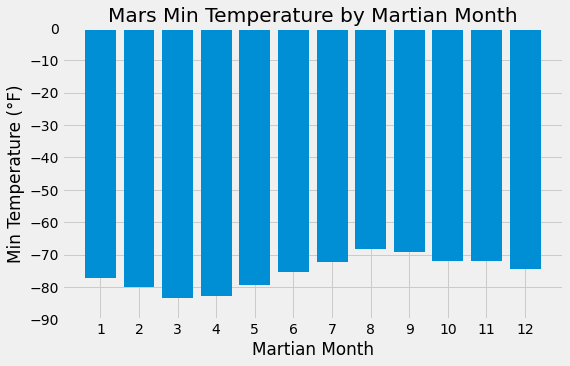

In [24]:
barplot(mintemp_df['month'], mintemp_df['min_temp'], 'Mars Min Temperature by Martian Month')

In [25]:
# months on Mars with lowest and highest atmospheric pressure
pressure_df = mars_df[headers[2:]].groupby('month', as_index=False).mean().sort_values('pressure')
pressure_df

,month,sol,ls,min_temp,pressure,ls_rad
5,6,750.829932,164.897959,-75.299320,745.054422,2.878012
4,5,1182.691275,132.885906,-79.308725,748.557047,2.319297
6,7,715.105634,194.894366,-72.281690,795.105634,3.401548
3,4,1244.500000,104.365979,-82.747423,806.329897,1.821530
11,12,990.951807,344.692771,-74.451807,842.156627,6.016024
10,11,947.224638,314.536232,-71.985507,857.014493,5.489693
0,1,1077.574713,15.281609,-77.160920,862.488506,0.266714
7,8,795.333333,224.347518,-68.382979,873.829787,3.915603
2,3,1204.406250,75.010417,-83.307292,877.322917,1.309179
9,10,1034.669643,286.330357,-71.982143,887.312500,4.997407


In [26]:
mars_df.loc[(mars_df['pressure'] == mars_df['pressure'].min()) | (mars_df['pressure'] == mars_df['pressure'].max()), headers[1:]]

,terrestrial_date,sol,ls,month,min_temp,pressure,ls_rad
156,2013-01-27,170,252,9,-66.0,925.0,4.398230
157,2013-01-28,171,253,9,-67.0,925.0,4.415683
766,2014-12-23,846,257,9,-74.0,925.0,4.485496
1866,2018-02-27,1977,135,5,-77.0,727.0,2.356194


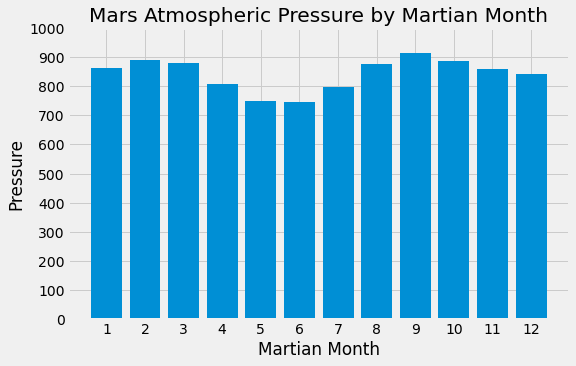

In [27]:
# plot the average atmospheric daily pressure of all the months
barplot(pressure_df['month'], pressure_df['pressure'], 'Mars Atmospheric Pressure by Martian Month')

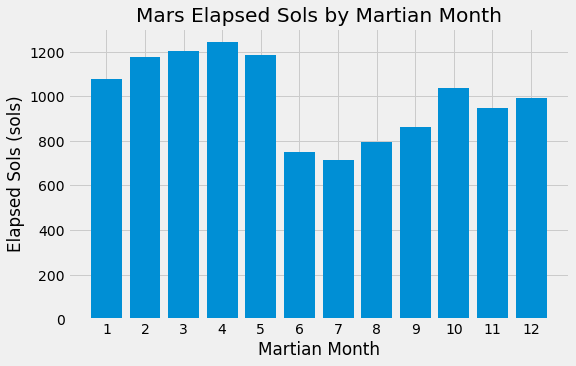

In [28]:
barplot(mintemp_df['month'], mintemp_df['sol'], 'Mars Elapsed Sols by Martian Month')

In [29]:
# Reimport Matplotlib.
import matplotlib
# Reset the style from Matplotlib to default.
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

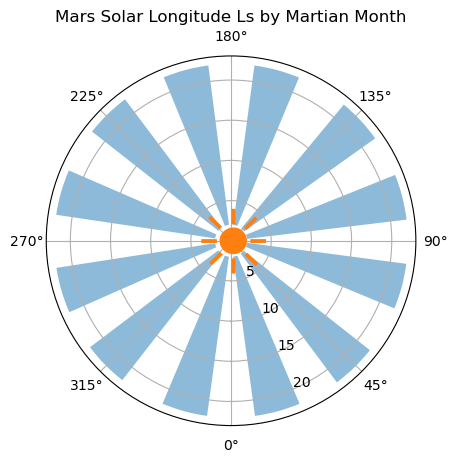

In [30]:
# bar chart on polar axis to show how solar longitudes change phases
theta = mintemp_df['ls_rad']
radii = 20
width = np.pi / len(mars_months)
ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=2.0, alpha=0.5)
ax.set_title('Mars Solar Longitude Ls by Martian Month')
ax.set_theta_zero_location('S')
# sun emoji as the center of the polar projection
ax.set_ylabel(u"\u2600", fontsize=64, color='tab:orange')
ax.yaxis.set_label_coords(np.pi/5, np.pi/6)
# Save the figure.
figname = './Data/mars_solarlongitude.png'
plt.savefig(figname, bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()

In [31]:
# # group the solar longitude Ls in the dataset
# ls_ranges = np.arange(0, 360, 30)
# mars_df['ls_range'] = pd.cut(mars_df['ls'], ls_ranges)
# mars_df

In [32]:
# plot the average minimum daily temperature of all the months
def plot2D(x, y, title):
    plt.rc('lines', linewidth=2, color='r')
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title, fontsize=18)
    ax.set_xlabel(title.split()[-1], fontsize=14)
    ax.set_ylabel('Min Temperature (\N{DEGREE SIGN}F)', fontsize=14)
    ax.set_xticks(np.arange(0, 2001, 200))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.set_yticks(np.arange(-60, -96, -5))
    ax.grid(which='both')
    ax.plot(x, y, '*')
    # Save the figure.
    figname = './Data/mars_mintemp_daily.png'
    fig.savefig(figname, bbox_inches='tight', facecolor='w')
    # Show Figure
    plt.show()

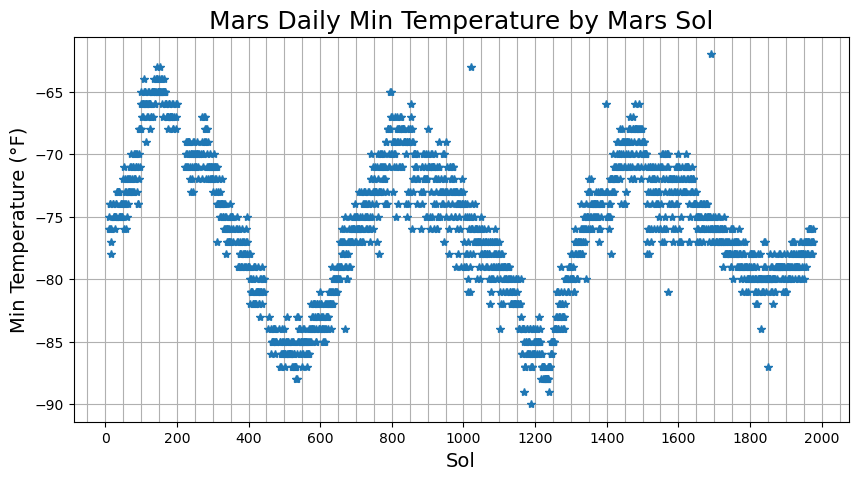

In [33]:
plot2D(mars_df['sol'], mars_df['min_temp'], 'Mars Daily Min Temperature by Mars Sol')

In [34]:
# 1 earth day = 86164.0916s or 23.93 hours (https://phys.org/news/2015-11-day-earth.html)
# 1 martian day = 88775.245s or 24.66 hours (http://www-mars.lmd.jussieu.fr/mars/time/solar_longitude.html)
# calculate how many sols exist in a Martian year based on monthly elapsed sols
sols = 0
for mm in mars_months:
    sol_duration = mars_df.loc[mars_df['month'] == mm, 'sol'].max() - mars_df.loc[mars_df['month'] == mm, 'sol'].min()
    sols += (sol_duration / 24.66)
# number of Martian days included in the dataset
print(mars_df['sol'].agg(['max', 'min']))
sol_range = mars_df['sol'].max() - mars_df['sol'].min()

max    1977
min      10
Name: sol, dtype: int64


In [35]:
# statistically calculate total orbital periods (= total Martian years)
mars_year = sol_range/sols
# Visually estimate the result from the daily minimum temperature plots
visual_mars_year = [2.9, 3.0, mars_year]
avg_visual_mars_year = np.mean(visual_mars_year[:2])
avg_mars_year = np.mean(visual_mars_year)
print(
    f'Mars sols in a Martian year (statistical estimate): {sols:.3f}\n'
    f'Mars sols in a Martian year (visual estimate):      {sol_range/avg_visual_mars_year:.3f}\n'
    f'Mars sols in a Martian year (average estimate):     {sol_range/avg_mars_year:.3f}'
)

Mars sols in a Martian year (statistical estimate): 675.710
Mars sols in a Martian year (visual estimate):      666.780
Mars sols in a Martian year (average estimate):     669.730


In [36]:
# number of terrestrial days included in the dataset
print(mars_df['terrestrial_date'].agg(['max', 'min']))
tday_range = (mars_df['terrestrial_date'].max() - mars_df['terrestrial_date'].min()).days

max   2018-02-27
min   2012-08-16
Name: terrestrial_date, dtype: datetime64[ns]


In [37]:
# Calculate total terrestrial years in the dataset (Mars orbits the Sun once = 1 Martian year) 
earth_year = tday_range / 365.25

In [38]:
# estimate how many Earth days exist in a Martian year 
visual_sols_to_earthdays = tday_range / avg_visual_mars_year
avg_sols_to_earthdays = tday_range / avg_mars_year
ref_period = 687
pct_visual_period_diff = (visual_sols_to_earthdays / ref_period - 1)*100
pct_avg_period_diff = (avg_sols_to_earthdays / ref_period - 1)*100

In [39]:
# Calculate total years in the dataset and summary results for markdown report
print(
    f'- Exact Earth years in the dataset:                {earth_year:7.3f}\n'
    f'- Martian years in the dataset (visual estimate):  {avg_visual_mars_year:7.3f}\n'
    f'- Martian years in the dataset (average estimate): {avg_mars_year:7.3f}\n'
    f'- Earth days in a Martian year (visual estimate):  {visual_sols_to_earthdays:7.3f} ({pct_visual_period_diff:6.3f}%)\n'
    f'- Earth days in a Martian year (average estimate): {avg_sols_to_earthdays:7.3f} ({pct_avg_period_diff:6.3f}%)'
)

- Exact Earth years in the dataset:                  5.533
- Martian years in the dataset (visual estimate):    2.950
- Martian years in the dataset (average estimate):   2.937
- Earth days in a Martian year (visual estimate):  685.085 (-0.279%)
- Earth days in a Martian year (average estimate): 688.116 ( 0.162%)


In [40]:
# Export the DataFrame as a CSV file (encoding='utf-8' by default on Python 3)
file_name = './Data/mars_data.csv'
mars_df.to_csv(file_name, index=False)

In [41]:
if webdrv == 'selenium':
    driver.quit()
else:
    browser.quit()